In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,NaN,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,NaN,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,NaN,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,NaN,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,NaN,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	60
float64		column 2	78
float64		column 3	66
float64		column 4	81
float64		column 5	79
float64		column 6	88
float64		column 7	69
float64		column 8	72


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1424.000000,1406.000000,1418.000000,1403.000000,1405.000000,1396.000000,1415.000000,1412.000000
mean,0.499965,0.501238,0.499323,0.260570,0.504982,0.007615,0.499894,0.275829
std,0.136326,0.123212,0.087002,0.136953,0.049679,0.076888,0.057830,0.104636
min,0.110000,0.140000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,0.990000


<AxesSubplot:>

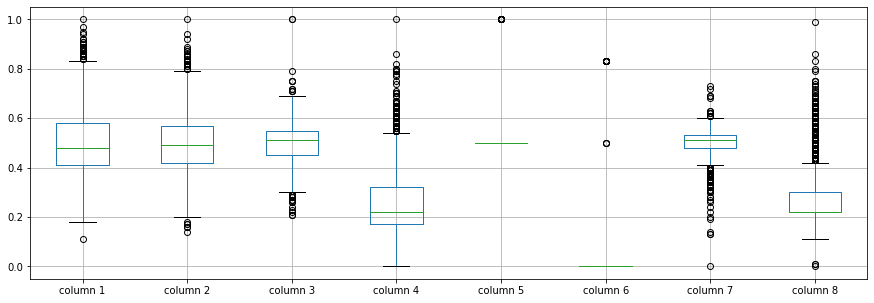

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499965
column 2    0.501238
column 3    0.499323
column 4    0.260570
column 5    0.504982
column 6    0.007615
column 7    0.499894
column 8    0.275829
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.573101,-0.159144,0.146651,0.050352,0.008978,0.086130,-0.123244
column 2,0.573101,1.000000,-0.271071,0.131236,0.062345,0.002923,0.098634,-0.096450
column 3,-0.159144,-0.271071,1.000000,0.066092,-0.010829,0.009744,-0.185263,-0.023303
column 4,0.146651,0.131236,0.066092,1.000000,-0.005961,-0.015913,-0.115544,-0.057857
column 5,0.050352,0.062345,-0.010829,-0.005961,1.000000,-0.008976,0.043350,0.002769
column 6,0.008978,0.002923,0.009744,-0.015913,-0.008976,1.000000,0.023586,-0.036920
column 7,0.086130,0.098634,-0.185263,-0.115544,0.043350,0.023586,1.000000,0.083049
column 8,-0.123244,-0.096450,-0.023303,-0.057857,0.002769,-0.036920,0.083049,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+14,8+14+14,8+14+14+14,8+14+14+14+14,8+14+14+14+14+14,8+14+14+14+14+14+14,8+14+14+14+14+14,8+14+14+14+14,8+14+14+14,8+14+14,8+14,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.927805755449378
Epoch: 1 , loss: 2.6700582374697146
Epoch: 2 , loss: 2.2922902172026425
Epoch: 3 , loss: 2.1351393940656083
Epoch: 4 , loss: 1.9655201266641202
Epoch: 5 , loss: 1.8837109182191931
Epoch: 6 , loss: 1.8075719009275022
Epoch: 7 , loss: 1.709728038829306
Epoch: 8 , loss: 1.6084895717061085
Epoch: 9 , loss: 1.575118829374728
Epoch: 10 , loss: 1.540937523479047
Epoch: 11 , loss: 1.4624160113541975
Epoch: 12 , loss: 1.4403685629367828
Epoch: 13 , loss: 1.3867320599763289
Epoch: 14 , loss: 1.3767609285271687
Epoch: 15 , loss: 1.3511566778887873
Epoch: 16 , loss: 1.304913712584454
Epoch: 17 , loss: 1.315890815594922
Epoch: 18 , loss: 1.273083151034687
Epoch: 19 , loss: 1.2574489278637844
Epoch: 20 , loss: 1.2579892387856608
Epoch: 21 , loss: 1.2230338324671206
Epoch: 22 , loss: 1.2375828442366228
Epoch: 23 , loss: 1.204991525929907
Epoch: 24 , loss: 1.20173739609511
Epoch: 25 , loss: 1.15981621

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.0,0.124107,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,-0.000369,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,-0.000511,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1480,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1481,0.0,-0.229293,0.0,0.000000,0.0,0.000000,0.0,0.0
1482,0.0,0.034619,0.0,0.000000,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3.794344817260889, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.08089572721503577

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.610000,0.47,0.254107,0.5,0.000000,0.48,0.22
1,0.43,0.670000,0.48,0.270000,0.5,0.000000,0.53,0.22
2,0.64,0.620000,0.49,0.150000,0.5,0.000000,0.53,0.22
3,0.58,0.440000,0.57,0.130000,0.5,-0.000369,0.54,0.22
4,0.42,0.440000,0.48,0.540000,0.5,-0.000511,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.630000,0.47,0.180000,0.5,0.000000,0.50,0.22
1480,0.35,0.290000,0.46,0.140000,0.5,0.000000,0.54,0.66
1481,0.41,0.240707,0.50,0.140000,0.5,0.000000,0.53,0.37
1482,0.51,0.484619,0.62,0.250000,0.5,0.000000,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_C_5(imp).xlsx", index=False, header=False)